In [1]:
# install fredapi, the api for fred where we will be scraping data from
!pip install fredapi

### IMPORT NECESSARY LIBRARIES

In [2]:
# Importing pandas library with alias pd for data manipulation
import pandas as pd

# Importing numpy library with alias np for numerical computing
import numpy as np

# Importing matplotlib.pyplot module with alias plt for plotting
import matplotlib.pyplot as plt

# Importing seaborn module with alias sns for plotting
import seaborn as sns

# Importing plotly.express library with alias px for interactive plotting
import plotly.express as px

# Importing fredapi
from fredapi import Fred

In [3]:
plt.style.use('fivethirtyeight') # Emulate popular data-driven website "FiveThirtyEight"

# Configuring pandas to display a maximum of 500 columns
pd.set_option('display.max_columns', 500)


# Accessing matplotlib configuration parameters related to the color cycle used for plotting axes
color_cycle = plt.rcParams['axes.prop_cycle']

# Extracting the color palette as a dictionary-like object
color_palette_dict = color_cycle.by_key()

# Accessing the sequence of colors defined in the color palette
color_pal = color_palette_dict['color']

plt.style.use('fivethirtyeight') is a command that sets the plotting style to emulate the style of the popular data-driven news website FiveThirtyEight. This command is typically used with `matplotlib`to adjust the appearance of plots generated using `matplotlib`.

### CREATING THE FRED OBJECT USING API KEY

In [4]:
# The fred object that would be created here is the object we will be using to search for any data we need from the website
# Fred api key generated for me on their website
fred_api_key = "c1411fa3a75d1a1847248dff76a432ae"

# fred object
fred_object = Fred(api_key = fred_api_key)

### SEARCH FOR ECONOMIC DATA

In [5]:
# Get economic data for S&P and order by popularity
s_and_p_data = fred_object.search('S&P', order_by='popularity')

In [6]:
# print the first 5 rows
s_and_p_data.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-03-01,2024-03-01,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-02-29,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-03-01 07:49:03-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-03-01,2024-03-01,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2023-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-02-27 08:14:02-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-03-01,2024-03-01,S&P 500,2014-03-03,2024-02-29,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-02-29 19:11:00-06:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-03-01,2024-03-01,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-03-01,2024-03-01,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-02-29,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-03-01 07:49:04-06:00,82,This data represents the effective yield of th...


### PULL RAW DATA TO TEST

<Axes: title={'center': 'SP500'}>

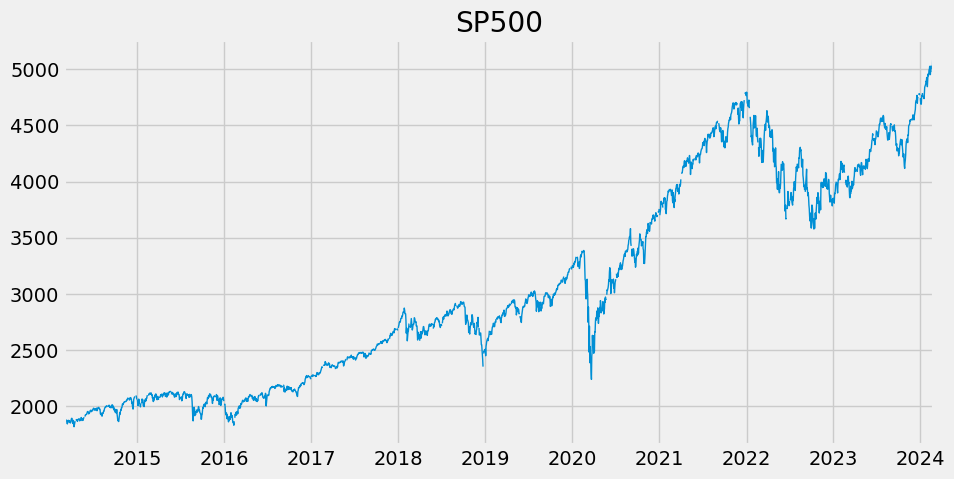

In [7]:
# Get S and P 500 data
sp500 = fred_object.get_series(series_id='SP500')

# Plot it on a graph
sp500.plot(figsize=(10,5), title='SP500', lw=1)

<Axes: title={'center': 'Unemployment Through The Years'}>

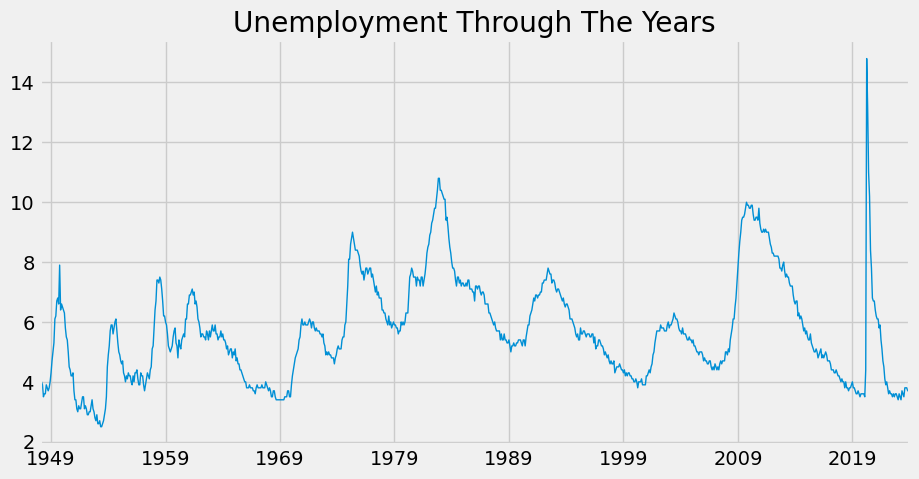

In [8]:
# General unemployment data
unrate = fred_object.get_series('UNRATE')

# Print first 5 rows
unrate.head()

# Plot it on a graph
unrate.plot(figsize=(10,5), title='Unemployment Through The Years', lw=1)

# A quick look at the graph automatically shows 2019 being the year with the highest unemployment. Reason? Covid

### THE DATA I NEED FOR MY ANALYSIS IS UNEMPLOYMENT DATA FOR THE STATES IN US, THE FRED OBJECT CRAETED AND TESTED ABOVE WILL BE USED TO GET THE DATA BELOW

In [9]:
# Filtered unemployment data using the fred object
unemployment_df = fred_object.search('unemployment rate state', filter=('frequency', 'Monthly')) # Get state data and filter by frequency and year
unemployment_df2 = unemployment_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"') # Get the data that are seasonally adjusted
unemployment_df4 = unemployment_df2[unemployment_df2['title'].str.contains('Unemployment Rate')] # Get the unemployment rate data

In [10]:
# Check the last 10 rows of the generated unemployment data
unemployment_df4.tail(10)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CNERUR,CNERUR,2024-03-01,2024-03-01,Unemployment Rate in Northeast Census Region,1976-01-01,2023-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-01-25 12:41:11-06:00,4,None
LRUNTTTTUSM156S,LRUNTTTTUSM156S,2024-03-01,2024-03-01,Unemployment Rate: Aged 15 and over: All Perso...,1960-01-01,2023-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-01-12 14:20:54-06:00,2,OECD Descriptor ID: LRUNTTTT OECD unit ID: PC ...
CWSTUR,CWSTUR,2024-03-01,2024-03-01,Unemployment Rate in West Census Region,1976-01-01,2023-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-01-25 12:41:11-06:00,6,None
CNEWUR,CNEWUR,2024-03-01,2024-03-01,Unemployment Rate in New England Census Division,1976-01-01,2023-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-01-25 12:41:10-06:00,6,None
LNS14000026,LNS14000026,2024-03-01,2024-03-01,"Unemployment Rate - 20 Yrs. & over, Women",1948-01-01,2024-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-02-02 07:49:46-06:00,6,To obtain estimates of women worker employment...
LNS14000048,LNS14000048,2024-03-01,2024-03-01,Unemployment Rate - 25 Yrs. & over,1948-01-01,2024-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-02-02 07:49:42-06:00,6,The series comes from the 'Current Population ...
LNS14000089,LNS14000089,2024-03-01,2024-03-01,Unemployment Rate - 25-34 Yrs.,1948-01-01,2024-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-02-02 07:49:46-06:00,6,The series comes from the 'Current Population ...
M08311USM156SNBR,M08311USM156SNBR,2024-03-01,2024-03-01,"Unemployment Rate, Married Males, Spouse Prese...",1954-11-01,1968-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:28:17-05:00,6,Beginning In 1960 Data Include Alaska And Hawa...
LNS14000150,LNS14000150,2024-03-01,2024-03-01,Unemployment Rate - Married Men,1955-01-01,2024-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-02-02 07:49:52-06:00,5,The series comes from the 'Current Population ...


The dataframe above is a compilation of different types of unemployment data (e.g states unemployment, national unemployment etc.) arranged row by row, I will be getting each unemployment data by using get series function while using the index of each unemployment data as a pointer. The series gotten would be converted to a dataframe and then all of the dataframes would be concatenated side by side using column axis(1)

In [11]:
# Create a loop that gets the series for each unemployment data and appends it to a list which is later concatenated to get a dataframe
all_data_results = []
for id in unemployment_df4.index:
    results = fred_object.get_series(id)
    results = results.to_frame(name=id)
    all_data_results.append(results)

In [12]:
# Concatenate all dataframes using the column axis
unemployment_rate_data = pd.concat(all_data_results,axis=1)

In [13]:
unemployment_rate_data.columns # Check the columns

Index(['UNRATE', 'LNS14000006', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR', 'U2RATE',
       'FLUR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'PAUR', 'OHUR',
       'LNS14000001', 'LNS14027660', 'MIUR', 'LNS14027662', 'ALUR',
       'LNS14024887', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR',
       'WIUR', 'VAUR', 'KYUR', 'LRUN64TTUSM156S', 'SCUR', 'NMUR', 'MNUR',
       'TNUR', 'LNS14032183', 'LNS14000012', 'WAUR', 'LNS14027659', 'MDUR',
       'ORUR', 'WVUR', 'NVUR', 'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR',
       'PRUR', 'INUR', 'LAUR', 'HIUR', 'LASMT261982000000003', 'NDUR', 'MTUR',
       'DCUR', 'MSUR', 'LNS14000060', 'LNS14000028', 'MEUR', 'NEUR',
       'LASMT391746000000003', 'CTUR', 'IDUR', 'NHUR', 'LNS14000018', 'RIUR',
       'KSUR', 'WYUR', 'DEUR', 'LNS14000036', 'VTUR', 'LNS14000032', 'SDUR',
       'CMWRUR', 'LNS14200000', 'LRUN24TTUSM156S', 'LNS14027689',
       'LNS14100000', 'LNS14000315', 

### DATA CLEANING

Renaming Columns: The columns are not named intuitively so as for anyone to recognise what they all stand for, they are in FRED's codes. They would have to be renamed, now that is serious work as I have to get the columns that are over 80 and run them through chatgpt with the right prompts to generate what each of the columns represent.

Dropping Columns: I need only the columns for the states, I will be dropping every other column

Handling Missing Data: The FRED Database unemployment data for all categories did not start at the same time and year so there would be missing values for some states or even all state in certain years, they would be dropped.

Handling Outliers

In [14]:
# Create a dictionary of the column names
name_columns = {
    'UNRATE': 'National Rate',
    'LNS14000006': 'Black or Afro-American',
    'CAUR': 'California Urban Rate',
    'TXUR': 'Texas Rate',
    'M0892AUSM156SNBR': 'Manufacturing Rate',
    'LNS14000024': 'Florida Rate',
    'LNS14000031': 'New York Rate',
    'M0892BUSM156SNBR': 'Business Sector Rate',
    'NYUR': 'New York Urban Rate',
    'U2RATE': 'U2 Rate',
    'FLUR': 'Florida Urban Rate',
    'LNS14000002': 'Alabama Rate',
    'LNS14000009': 'Pennsylvania Rate',
    'LNS14000003': 'Ohio Rate',
    'PAUR': 'Pennsylvania Urban Rate',
    'OHUR': 'Ohio Urban Rate',
    'LNS14000001': 'Alaska Rate',
    'LNS14027660': 'Arizona Rate',
    'MIUR': 'Michigan Rate',
    'LNS14027662': 'Arkansas Rate',
    'ALUR': 'Alabama Urban Rate',
    'LNS14024887': 'Colorado Rate',
    'MAUR': 'Massachusetts Rate',
    'NCUR': 'North Carolina Rate',
    'ILUR': 'Illinois Rate',
    'NJUR': 'New Jersey Rate',
    'GAUR': 'Georgia Rate',
    'COUR': 'Colorado Urban Rate',
    'AZUR': 'Arizona Urban Rate',
    'WIUR': 'Wisconsin Rate',
    'VAUR': 'Virginia Rate',
    'KYUR': 'Kentucky Rate',
    'LRUN64TTUSM156S': 'Long Run Unemployment Rate',
    'SCUR': 'South Carolina Rate',
    'NMUR': 'New Mexico Rate',
    'MNUR': 'Minnesota Rate',
    'TNUR': 'Tennessee Rate',
    'LNS14032183': 'Connecticut Rate',
    'LNS14000012': 'Louisiana Rate',
    'WAUR': 'Washington Rate',
    'LNS14027659': 'Nevada Rate',
    'MDUR': 'Maryland Rate',
    'ORUR': 'Oregon Rate',
    'WVUR': 'West Virginia Rate',
    'NVUR': 'Nevada Urban Rate',
    'ARUR': 'Arkansas Urban Rate',
    'OKUR': 'Oklahoma Rate',
    'MOUR': 'Missouri Rate',
    'AKUR': 'Alaska Urban Rate',
    'IAUR': 'Iowa Rate',
    'UTUR': 'Utah Rate',
    'PRUR': 'Puerto Rico Rate',
    'INUR': 'Indiana Rate',
    'LAUR': 'Louisiana Urban Rate',
    'HIUR': 'Hawaii Rate',
    'LASMT261982000000003': 'Detroit-Warren-Dearborn Rate',
    'NDUR': 'North Dakota Rate',
    'MTUR': 'Montana Rate',
    'DCUR': 'District of Columbia Rate',
    'MSUR': 'Mississippi Rate',
    'LNS14000060': 'Rhode Island Rate',
    'LNS14000028': 'Maine Rate',
    'MEUR': 'Maine Urban Rate',
    'NEUR': 'Nebraska Rate',
    'LASMT391746000000003': 'Las Vegas Urban Rate',
    'CTUR': 'Connecticut Urban Rate',
    'IDUR': 'Idaho Rate',
    'NHUR': 'New Hampshire Rate',
    'LNS14000018': 'Rhode Island Urban Rate',
    'RIUR': 'Rhode Island Urban Rate',
    'KSUR': 'Kansas Rate',
    'WYUR': 'Wyoming Rate',
    'DEUR': 'Delaware Rate',
    'LNS14000036': 'Vermont Rate',
    'VTUR': 'Vermont Urban Rate',
    'LNS14000032': 'South Dakota Rate',
    'SDUR': 'South Dakota Urban Rate',
    'CMWRUR': 'Combined Washington Rate',
    'LNS14200000': 'National Rate 2',
    'LRUN24TTUSM156S': 'Long Run 24 Unemployment Rate',
    'LNS14027689': 'North Carolina Urban Rate',
    'LNS14100000': 'National Rate 3',
    'LNS14000315': 'National Rate 4',
    'LNS14000029': 'Michigan Urban Rate',
    'LNS14024230': 'Indiana Urban Rate',
    'CSOUUR': 'Central Southern Urban Rate',
    'LNS14000025': 'West Virginia Urban Rate',
    'LNS14000061': 'Wyoming Urban Rate',
    'CNERUR': 'Central Northeast Urban Rate',
    'LRUNTTTTUSM156S': 'Long Run Triple T Unemployment Rate',
    'CWSTUR': 'Central Western Urban Rate',
    'CNEWUR': 'Central New Urban Rate',
    'LNS14000026': 'North Dakota Urban Rate',
    'LNS14000048': 'Montana Urban Rate',
    'LNS14000089': 'Idaho Urban Rate',
    'M08311USM156SNBR': 'Management Rate',
    'LNS14000150': 'Oregon Urban Rate',
    'LRUN25TTUSM156S': 'Long Run 25 Unemployment Rate'
}

# Rename the columns by passing the created dictionary above, this is done inplace
unemployment_rate_data.rename(columns=name_columns, inplace=True)

The data I want to make use of for this project is the unemployment rate for the vraious states in the US, A closer look at our final data with the renamed columns shows that we have other data series apart from that of states. I will be dropping them.

In [15]:
# Visualize the columns so as to know which ones to drop
unemployment_rate_data.columns

Index(['National Rate', 'Black or Afro-American', 'California Urban Rate',
       'Texas Rate', 'Manufacturing Rate', 'Florida Rate', 'New York Rate',
       'Business Sector Rate', 'New York Urban Rate', 'U2 Rate',
       'Florida Urban Rate', 'Alabama Rate', 'Pennsylvania Rate', 'Ohio Rate',
       'Pennsylvania Urban Rate', 'Ohio Urban Rate', 'Alaska Rate',
       'Arizona Rate', 'Michigan Rate', 'Arkansas Rate', 'Alabama Urban Rate',
       'Colorado Rate', 'Massachusetts Rate', 'North Carolina Rate',
       'Illinois Rate', 'New Jersey Rate', 'Georgia Rate',
       'Colorado Urban Rate', 'Arizona Urban Rate', 'Wisconsin Rate',
       'Virginia Rate', 'Kentucky Rate', 'Long Run Unemployment Rate',
       'South Carolina Rate', 'New Mexico Rate', 'Minnesota Rate',
       'Tennessee Rate', 'Connecticut Rate', 'Louisiana Rate',
       'Washington Rate', 'Nevada Rate', 'Maryland Rate', 'Oregon Rate',
       'West Virginia Rate', 'Nevada Urban Rate', 'Arkansas Urban Rate',
       'Oklah

In [16]:
# Drop unemployment data outside of states
columns_drop = ['National Rate', 'Black or Afro-American', 'Manufacturing Rate',
                'Business Sector Rate', 'U2 Rate', 'Long Run Unemployment Rate',
                'Puerto Rico Rate', 'Detroit-Warren-Dearborn Rate', 'National Rate 2',
                'Long Run 24 Unemployment Rate', 'National Rate 3', 'National Rate 4',
                'Central Northeast Urban Rate', 'Long Run Triple T Unemployment Rate',
                'Central Western Urban Rate', 'Central New Urban Rate', 'Management Rate',
                'Long Run 25 Unemployment Rate']

unemployment_rate_data.drop(columns_drop, axis=1, inplace= True)

In [17]:
# We now have states data
unemployment_rate_data

,California Urban Rate,Texas Rate,Florida Rate,New York Rate,New York Urban Rate,Florida Urban Rate,Alabama Rate,Pennsylvania Rate,Ohio Rate,Pennsylvania Urban Rate,Ohio Urban Rate,Alaska Rate,Arizona Rate,Michigan Rate,Arkansas Rate,Alabama Urban Rate,Colorado Rate,Massachusetts Rate,North Carolina Rate,Illinois Rate,New Jersey Rate,Georgia Rate,Colorado Urban Rate,Arizona Urban Rate,Wisconsin Rate,Virginia Rate,Kentucky Rate,South Carolina Rate,New Mexico Rate,Minnesota Rate,Tennessee Rate,Connecticut Rate,Louisiana Rate,Washington Rate,Nevada Rate,Maryland Rate,Oregon Rate,West Virginia Rate,Nevada Urban Rate,Arkansas Urban Rate,Oklahoma Rate,Missouri Rate,Alaska Urban Rate,Iowa Rate,Utah Rate,Indiana Rate,Louisiana Urban Rate,Hawaii Rate,North Dakota Rate,Montana Rate,District of Columbia Rate,Mississippi Rate,Rhode Island Rate,Maine Rate,Maine Urban Rate,Nebraska Rate,Las Vegas Urban Rate,Connecticut Urban Rate,Idaho Rate,New Hampshire Rate,Rhode Island Urban Rate,Rhode Island Urban Rate,Kansas Rate,Wyoming Rate,Delaware Rate,Vermont Rate,Vermont Urban Rate,South Dakota Rate,South Dakota Urban Rate,Combined Washington Rate,North Carolina Urban Rate,Michigan Urban Rate,Indiana Urban Rate,Central Southern Urban Rate,West Virginia Urban Rate,Wyoming Urban Rate,North Dakota Urban Rate,Montana Urban Rate,Idaho Urban Rate,Oregon Urban Rate
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,4.7,4.1,3.5,5.6,4.0,2.8,3.4,4.6,3.4,3.4,3.4,4.1,4.1,3.9,2.2,2.2,8.4,2.6,3.4,4.4,4.4,3.4,3.2,4.0,3.1,2.5,4.1,2.9,3.7,3.1,3.2,2.9,11.8,3.6,5.5,1.6,3.5,3.8,5.4,2.9,3.0,2.9,4.1,3.0,2.6,3.6,3.3,2.8,1.9,2.7,5.0,3.2,3.2,3.5,2.7,2.1,3.7,3.5,3.1,2.0,23.9,2.6,2.8,2.9,4.1,7.0,1.9,4.5,1.9,3.4,3.0,2.8,2.7,3.2,3.8,3.6,3.1,3.0,4.0,2.1
2023-10-01,4.8,4.1,3.5,5.3,4.2,2.8,3.6,4.8,3.5,3.4,3.6,4.1,4.0,4.1,2.1,2.3,8.8,2.8,3.4,4.6,4.6,3.4,3.3,4.2,3.2,2.7,4.2,2.9,3.8,3.2,3.3,3.1,13.1,3.8,5.8,1.7,3.6,4.0,5.4,3.1,3.2,3.1,4.3,3.2,2.7,3.6,3.3,2.9,1.9,2.8,5.0,3.3,3.2,3.3,2.8,2.2,3.7,3.5,3.2,2.1,18.7,2.7,2.9,2.9,4.2,7.0,2.0,5.3,2.0,3.6,3.1,2.8,2.7,3.3,3.7,3.4,3.2,3.1,4.

In [18]:
# Check missing values
unemployment_rate_data.isna().sum()

California Urban Rate      550
Texas Rate                 550
Florida Rate               213
New York Rate              501
New York Urban Rate        550
                          ... 
Wyoming Urban Rate         213
North Dakota Urban Rate    213
Montana Urban Rate         213
Idaho Urban Rate           213
Oregon Urban Rate          297
Length: 80, dtype: int64

Handling Missing Values

Handling missing values in an unemployment database, the choice of measure of central tendency depends on the nature of the data. Here a few ways to handle the missing values in this data:

1. Mean: The mean is sensitive to outliers and can be affected by missing values. If the data has a symmetric distribution and no extreme outliers, the mean can provide a good estimate of central tendency. However, if there are outliers or the data is skewed, the mean may not accurately represent the typical value.

2. Median: The median is less sensitive to outliers compared to the mean and provides a robust estimate of central tendency. It is suitable for data with skewed distributions or when outliers are present. The median is also less affected by missing values compared to the mean, making it a good choice when dealing with incomplete data.

3. Mode: The mode represents the most frequently occurring value in the data. It is useful for categorical or discrete data but may not be applicable for continuous data measured in percentages. If the data has a clear peak or mode, it can provide a representative value even in the presence of missing values.

Let us visualize our data using histograms to see if they are skewed or not so as to know what measure of central tendency to use in handling our missing values.

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'

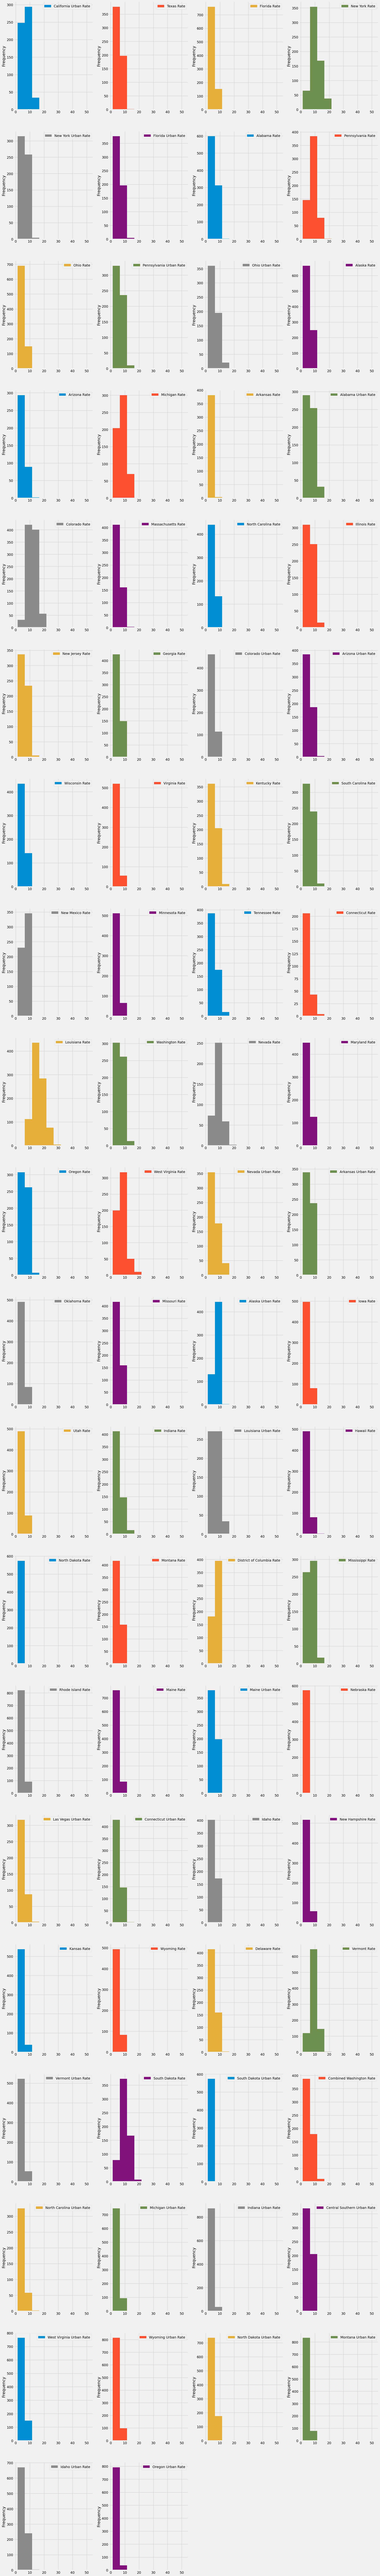

In [19]:
column_list = [] # Empty list to take all column names
# Iterate through each column in the DataFrame and append column names to the list created
for column in unemployment_rate_data.columns:
    column_list.append(column)
    
# Plot the density graph of each column
unemployment_rate_data[column_list].plot(kind='hist', subplots=True, layout=(27,4), sharex=False, figsize=(24,246))

Most of our data are skewed so the median is most appropriate to use in this case.

In summary, to handle the missing values in this dataset, I will be using the median because it is often preferred as it provides a robust estimate of central tendency and is less affected by outliers and missing values compared to the mean.

In [20]:
# Replace all missing values with the median values of each column
unemployment_rate_data = unemployment_rate_data[column_list].fillna(unemployment_rate_data[column_list].agg(np.median))

In [21]:
# Check to see if all missing values have been handled
unemployment_rate_data.isna().sum()

# We are good to go.

California Urban Rate      0
Texas Rate                 0
Florida Rate               0
New York Rate              0
New York Urban Rate        0
                          ..
Wyoming Urban Rate         0
North Dakota Urban Rate    0
Montana Urban Rate         0
Idaho Urban Rate           0
Oregon Urban Rate          0
Length: 82, dtype: int64

In [22]:
unemployment_rate_data.head()

,California Urban Rate,Texas Rate,Florida Rate,New York Rate,New York Urban Rate,Florida Urban Rate,Alabama Rate,Pennsylvania Rate,Ohio Rate,Pennsylvania Urban Rate,Ohio Urban Rate,Alaska Rate,Arizona Rate,Michigan Rate,Arkansas Rate,Alabama Urban Rate,Colorado Rate,Massachusetts Rate,North Carolina Rate,Illinois Rate,New Jersey Rate,Georgia Rate,Colorado Urban Rate,Arizona Urban Rate,Wisconsin Rate,Virginia Rate,Kentucky Rate,South Carolina Rate,New Mexico Rate,Minnesota Rate,Tennessee Rate,Connecticut Rate,Louisiana Rate,Washington Rate,Nevada Rate,Maryland Rate,Oregon Rate,West Virginia Rate,Nevada Urban Rate,Arkansas Urban Rate,Oklahoma Rate,Missouri Rate,Alaska Urban Rate,Iowa Rate,Utah Rate,Indiana Rate,Louisiana Urban Rate,Hawaii Rate,North Dakota Rate,Montana Rate,District of Columbia Rate,Mississippi Rate,Rhode Island Rate,Maine Rate,Maine Urban Rate,Nebraska Rate,Las Vegas Urban Rate,Connecticut Urban Rate,Idaho Rate,New Hampshire Rate,Rhode Island Urban Rate,Rhode Island Urban Rate,Rhode Island Urban Rate,Rhode Island Urban Rate,Kansas Rate,Wyoming Rate,Delaware Rate,Vermont Rate,Vermont Urban Rate,South Dakota Rate,South Dakota Urban Rate,Combined Washington Rate,North Carolina Urban Rate,Michigan Urban Rate,Indiana Urban Rate,Central Southern Urban Rate,West Virginia Urban Rate,Wyoming Urban Rate,North Dakota Urban Rate,Montana Urban Rate,Idaho Urban Rate,Oregon Urban Rate
1929-04-01,6.8,5.8,4.8,10.0,6.3,5.7,5.7,8.3,4.9,5.8,5.9,5.3,5.0,7.2,2.5,6.4,11.6,5.2,5.3,6.3,5.9,5.5,5.3,5.8,4.8,4.4,5.7,6.1,6.7,4.5,5.7,4.1,16.0,6.3,8.2,4.9,6.2,6.9,5.75,5.95,4.6,5.6,7.3,4.2,4.4,5.3,6.6,4.55,3.4,5.5,7.55,6.6,4.3,4.1,5.3,3.1,5.3,5.15,5.55,3.8,34.0,34.0,34.0,34.0,4.4,4.6,4.7,9.0,4.2,9.5,3.4,5.6,4.1,4.4,3.5,5.7,4.6,4.0,5.0,4.1,5.2,3.2
1929-05-01,6.8,5.8,4.8,10.0,6.3,5.7,5.7,8.3,4.9,5.8,5.9,5.3,5.0,7.2,2.5,6.4,11.6,5.2,5.3,6.3,5.9,5.5,5.3,5.8,4.8,4.4,5.7,6.1,6.7,4.5,5.7,4.1,16.0,6.3,8.2,4.9,6.2,6.9,5.75,5.95,4.6,5.6,7.3,4.2,4.4,5.3,6.6,4.55,3.4,5.5,7.55,6.6,4.3,4.1,5.3,3.1,5.3,5.15,5.55,3.8,34.0,34.0,34.0,34.0,4.4,4.6,4.7,9.0,4.2,9.5,3.4,5.6,4.1,4.4,3.5,5.7,4.6,4.0,5.0,4.1,5.2,3.2
1929-06-01,6.8,5.8,4.8,10.0,6.3,5.7,5.7,8.3,4.9,5.8,5.9,5.3,5.0,7.2,2.5,6.4,11.6,5.2,5.3,6.3,5.9,5.5,5.3,5.8,4.8,4.4,5.7,6.1,6.7,4.5,5.7,4.1,16.0,6.3,8.2,4.9,6.2,6.9,5.75,5.95,4.6,5.6,7.3,4.2,4.4,5.3,6.6,4.55,3.4,5.5,7.55,6.6,4.3,4.1,5.3,3.1,5.3,5.15,5.55,3.8,34.0,34.0,34.0,34.0,4.4,4.6,4.7,9.0,4.2,9.5,3.4,5.6,4.1,4.4,3.5,5.7,4.6,4.0,5.0,4.1,5.2,3.2
1929-07-01,6.8,5.8,4.8,10.0,6.3,5.7,5.7,8.3,4.9,5.8,5.9,5.3,5.0,7.2,2.5,6.4,11.6,5.2,5.3,6.3,5.9,5.5,5.3,5.8,4.8,4.4,5.7,6.1,6.7,4.5,5.7,4.1,16.0,6.3,8.2,4.9,6.2,6.9,5.75,5.95,4.6,5.6,7.3,4.2,4.4,5.3,6.6,4.55,3.4,5.5,7.55,6.6,4.3,4.1,5.3,3.1,5.3,5.15,5.55,3.8,34.0,34.0,34.0,34.0,4.4,4.6,4.7,9.0,4.2,9.5,3.4,5.6,4.1,4.4,3.5,5.7,4.6,4.0,5.0,4.1,5.2,3.2
1929-08-01,6.8,5.8,4.8,10.0,6.3,5.7,5.7,8.3,4.9,5.8,5.9,5.3,5.0,7.2,2.5,6.4,11.6,5.2,5.3,6.3,5.9,5.5,5.3,5.8,4.8,4.4,5.7,6.1,6.7,4.5,5.7,4.1,16.0,6.3,8.2,4.9,6.2,6.9,5.75,5.95,4.6,5.6,7.3,4.2,4.4,5.3,6.6,4.55,3.4,5.5,7.55,6.6,4.3,4.1,5.3,3.1,5.3,5.15,5.55,3.8,34.0,34.0,34.0,34.0,4.4,4.6,4.7,9.0,4.2,9.5,3.4,5.6,4.1,4.4,3.5,5.7,4.6,4.0,5.0,4.1,5.2,3.2


Handling Outliers

California Urban Rate          Axes(0.08,0.854845;0.18913x0.0251553)
Texas Rate                 Axes(0.306957,0.854845;0.18913x0.0251553)
Florida Rate               Axes(0.533913,0.854845;0.18913x0.0251553)
New York Rate               Axes(0.76087,0.854845;0.18913x0.0251553)
New York Urban Rate            Axes(0.08,0.824658;0.18913x0.0251553)
                                             ...                    
Wyoming Urban Rate         Axes(0.306957,0.311491;0.18913x0.0251553)
North Dakota Urban Rate    Axes(0.533913,0.311491;0.18913x0.0251553)
Montana Urban Rate          Axes(0.76087,0.311491;0.18913x0.0251553)
Idaho Urban Rate               Axes(0.08,0.281304;0.18913x0.0251553)
Oregon Urban Rate          Axes(0.306957,0.281304;0.18913x0.0251553)
Length: 78, dtype: object

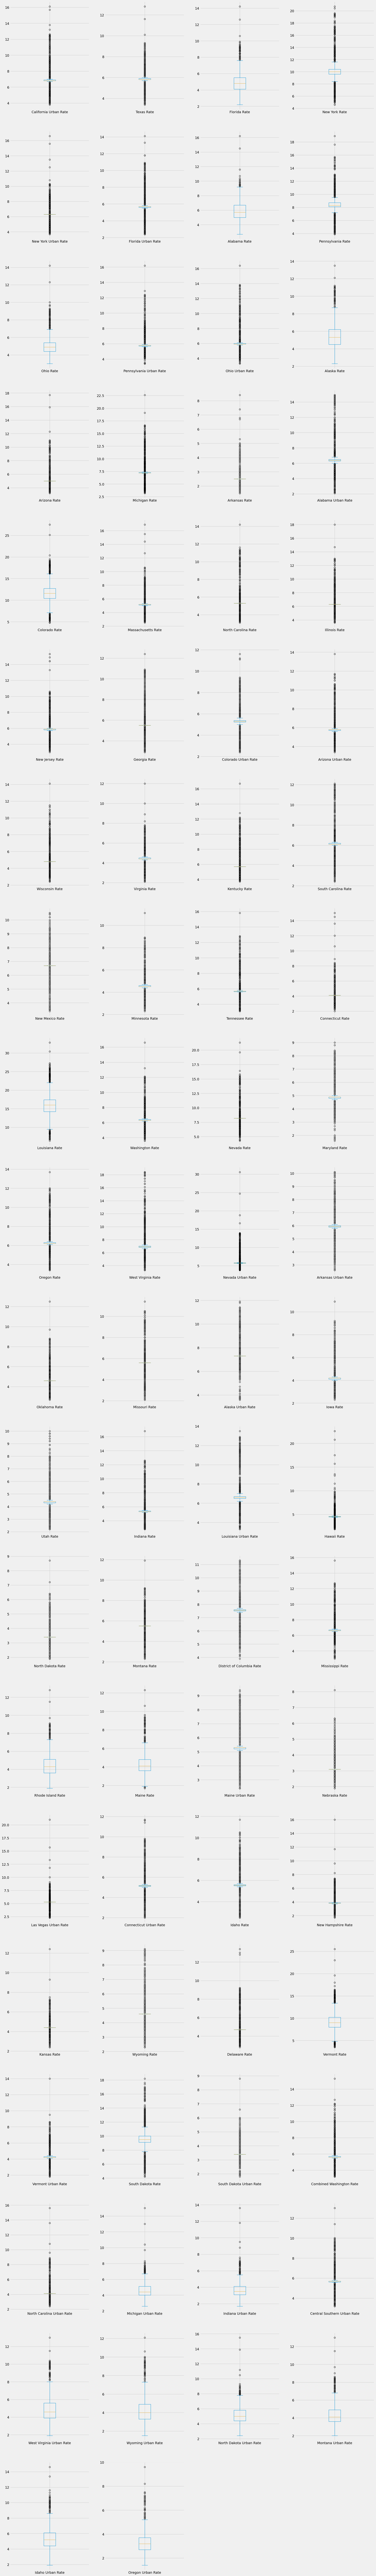

In [23]:
# Let us visualize our data to see if we have outliers
# Plot the density graph of each column
unemployment_rate_data[column_list].plot(kind='box', subplots=True, layout=(27,4), sharex=False, figsize=(24,246))

In [24]:
# We have outliers in our dataset
unemployment_rate_data.shape # Check shape before handling outliers

(1126, 82)

In [32]:
unemployment_rate_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1126 entries, 1929-04-01 to 2024-01-01
Data columns (total 82 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   California Urban Rate        1126 non-null   float64
 1   Texas Rate                   1126 non-null   float64
 2   Florida Rate                 1126 non-null   float64
 3   New York Rate                1126 non-null   float64
 4   New York Urban Rate          1126 non-null   float64
 5   Florida Urban Rate           1126 non-null   float64
 6   Alabama Rate                 1126 non-null   float64
 7   Pennsylvania Rate            1126 non-null   float64
 8   Ohio Rate                    1126 non-null   float64
 9   Pennsylvania Urban Rate      1126 non-null   float64
 10  Ohio Urban Rate              1126 non-null   float64
 11  Alaska Rate                  1126 non-null   float64
 12  Arizona Rate                 1126 non-null   float64
 13  

In [44]:
print(type(unemployment_rate_data["California Urban Rate"]))

<class 'pandas.core.series.Series'>


In [54]:
# Empty list to store outliers
outliers = []

# Iterate through each column
for column in unemployment_rate_data.columns:
    
    # Calculate mean and standard deviation for the current column
    column_mean = unemployment_rate_data[column].mean()
    column_std = unemployment_rate_data[column].std()
    
    # Calculate upper and lower bounds for outliers
    lower_bound = column_mean - 3 * column_std
    upper_bound = column_mean + 3 * column_std
    
    # Find outliers for the current column and append them to the outliers list
    column_outliers = unemployment_rate_data.loc[(unemployment_rate_data[column] < lower_bound) | (unemployment_rate_data[column] > upper_bound)]
    outliers.append(column_outliers)

# Concatenate outliers for all columns into a single DataFrame
all_outliers = pd.concat(outliers)

# Print or further process the DataFrame containing outliers
print(all_outliers)

ValueError: Cannot index with multidimensional key